In [112]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from sympy import *

# Bifurcation analysis
First calculating fixed points for the system

In [48]:
factor = 100
lambda_vals = [i/(10*factor) for i in range(1,5*factor)]
R = 2
delta = 1/6

save_fig = False

def eq_1_solver(lambda_value): #f < 0
    f = sp.symbols('f')
    equation = sp.Eq(lambda_value * f, R*delta/(delta-f) - 1/(1-f))
    solutions = sp.solve(equation, f)
    real_solutions = [sp.re(sol) for sol in solutions]
    return real_solutions[0], real_solutions[1]

def eq_2_solver(lambda_value): #f > 0
    f = sp.symbols('f')
    equation = sp.Eq(lambda_value * f, R*delta/(delta+f) - 1/(1+f))
    solutions = sp.solve(equation, f)
    real_solutions = [sp.re(sol) for sol in solutions]
    return real_solutions[0]

[0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018, 0.019, 0.02, 0.021, 0.022, 0.023, 0.024, 0.025, 0.026, 0.027, 0.028, 0.029, 0.03, 0.031, 0.032, 0.033, 0.034, 0.035, 0.036, 0.037, 0.038, 0.039, 0.04, 0.041, 0.042, 0.043, 0.044, 0.045, 0.046, 0.047, 0.048, 0.049, 0.05, 0.051, 0.052, 0.053, 0.054, 0.055, 0.056, 0.057, 0.058, 0.059, 0.06, 0.061, 0.062, 0.063, 0.064, 0.065, 0.066, 0.067, 0.068, 0.069, 0.07, 0.071, 0.072, 0.073, 0.074, 0.075, 0.076, 0.077, 0.078, 0.079, 0.08, 0.081, 0.082, 0.083, 0.084, 0.085, 0.086, 0.087, 0.088, 0.089, 0.09, 0.091, 0.092, 0.093, 0.094, 0.095, 0.096, 0.097, 0.098, 0.099, 0.1, 0.101, 0.102, 0.103, 0.104, 0.105, 0.106, 0.107, 0.108, 0.109, 0.11, 0.111, 0.112, 0.113, 0.114, 0.115, 0.116, 0.117, 0.118, 0.119, 0.12, 0.121, 0.122, 0.123, 0.124, 0.125, 0.126, 0.127, 0.128, 0.129, 0.13, 0.131, 0.132, 0.133, 0.134, 0.135, 0.136, 0.137, 0.138, 0.139, 0.14, 0.141, 0.142, 0.143, 0.144, 0.145,

In [123]:
f1, f2 = eq_1_solver(1/5)
print(f1)
print(f2)

-1.06790979891806
-0.307026886053647


In [49]:
stable_bif = []
saddle_bif = []
spiral_bif = []

for i in lambda_vals:
    stable_bif.append(eq_1_solver(i)[0])
    saddle_bif.append(eq_1_solver(i)[1])
    spiral_bif.append(eq_2_solver(i))


In [99]:
def find_intersection_saddle_and_stable():
    intersection = []
    intersection_i = []
    for i in range(len(stable_bif)):
        if abs(saddle_bif[i]-stable_bif[i]) < 1:
            intersection.append(stable_bif[i])
            intersection_i.append(i)
    return intersection,intersection_i

intersection, intersection_i = find_intersection_saddle_and_stable()

[160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332]
332
[-1.29081324268599, -1.28420972264907, -1.27766236419985, -1.27117026421449, -1.26473253809113, -1.25834831923325, -1.252016758549

# Plotting the bifurcation diagram

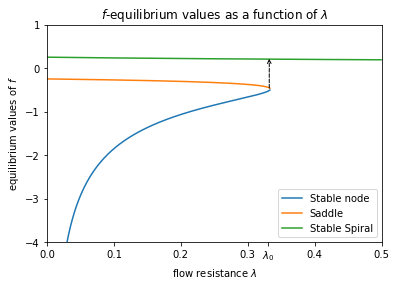

In [110]:
def make_bifurcation_diagram():
    i = len(intersection_i)-1
    j = 1
    plt.plot(lambda_vals[0:intersection_i[i]+j], stable_bif[0:intersection_i[i]+j], label='Stable node')
    plt.plot(lambda_vals[0:intersection_i[i]+j], saddle_bif[0:intersection_i[i]+j], label='Saddle')
    plt.plot(lambda_vals, spiral_bif, label='Stable Spiral')

    plt.xlabel('flow resistance $\lambda$')
    plt.ylabel(r'equilibrium values of $f$')
    plt.title(r'$f$-equilibrium values as a function of $\lambda$')
    plt.ylim(-4, 1)
    plt.xlim(0, 0.5)
    plt.xticks([0, 0.1, 0.2, 0.3, 0.33, 0.4, 0.5], [0.0, 0.1, 0.2, 0.3, r'$\lambda_0$', 0.4, 0.5])

    x_start = intersection_i[i]/(10*factor)
    y_start = stable_bif[-1]
    x_end = intersection_i[i]/(10*factor)
    y_end = spiral_bif[-1]

    arrow_props = dict(arrowstyle='->', color='k', lw=1, ls='dashed')
    plt.annotate('', xy=(x_end, y_end+0.07), xytext=(x_start, intersection[-1]),
             arrowprops=arrow_props, fontsize=9, color='k')

    plt.legend()
    desktop_path = '/Users/karlfindhansen/Desktop/bifurcation_diagram.png'  
    if save_fig:
        plt.savefig(desktop_path, dpi=300)
    return plt.show()


make_bifurcation_diagram()


# Find bifurcation value
Did it in maple already, but this would be nicer! It just takes a very long time to run.

Maybe you can try on your stationary computer?

In [127]:

delta = 1/6
R = 2
lambda_val, f = sp.symbols('lambda f')

eq1 = sp.Eq(lambda_val * f, R * delta / (delta - f) - 1 / (1 - f))

solutions = sp.solve(eq1, f)
sol1 = solutions[0]  
sol2 = solutions[1]  


In [129]:
# Solve for lambda where sol1 = sol2
lambda_solutions = sp.solve(sp.Eq(sol1, sol2), lambda_val)

In [ ]:
# Find the real part of the first lambda solution
real_lambda = sp.re(lambda_solutions[0])

# Evaluate the result
result = sp.N(real_lambda)  # Convert to a numeric value

print(result)